## probability_exercise_KEEP_FOR_LATER

## Warmup

It's another day at the office at Big Research Co ™. You look up from your laptop and see a woman in a lab coat standing in front of your desk.

"I need some help" she says. "We lost some subjects from the trial."

She notices a curious look on your face. "Not like that, they just ran away. We didn't lock the doors soon enough."

"Anyway, there's probably like a 70%, no maybe 80%, no, let's say 90% chance that a given subject will stick around, and I need to run the study again with 10, or 20 subjects. We need to gather enough data on them to justify the cost, so I need you to figure out what are the probabilities are that at least half of them stick around, only 1 person leaves, and that all the subjects stay."

She sees you start to form another question and cuts you off.

"Don't ask. You really don't want to know."


#### What probability distribution would you use to model the scenario outlined above?

Calculate all the requested probabilities. Use all the possible combinations of subject count and chance that a subject will stay in the study.

Bonus: visualize the requested probabilities.
    
Hints
Use scipy.stats for this.

A fancy list comprehension or the itertools module can help you find all the possible combinations.

Each distribution has a cumulative density function that tells you the likelihood that a value falls at or below a given point.

Consider storing the results of your calculations in a data frame.

In [22]:
from scipy import stats

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ten trials, 90% chance they stay

n = 10
p = .9

stats.binom.pmf(n=10, p=.9, k=10)  # odds we'll have 10 people stay in the study

0.34867844010000004

In [3]:
# pmf = probablity mass function (probability at a single point)

In [8]:
# ten trials, 90% chance they stay

n = 20
p = .8

stats.binom.cdf(n=20,p=.8,k=19)  # probability of this given k value *or less*

0.9884707849539315

In [ ]:
# cdf = cumulative probability

In [9]:
stats.binom.cdf(n=10,p=.8, k=5)  #probability that half or fewer subjects stick around

0.032793497599999964

In [11]:
1 - stats.binom.cdf(n=10,p=.8, k=5)  #probability that more than half of subjects stick around

0.9672065024000001

In [12]:
stats.binom.sf(n=10,p=.8, k=5) # also shown at left as the "survival function", ie ".sf"
# survival function as in '1 - xxx'

0.9672065024000001

In [13]:
n_subjects = 10
p_subject_stays = .7
n_subjects_that_stay = range(11)

Text(0.5, 0, 'test')

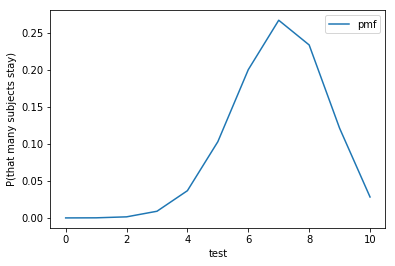

In [23]:
# probability that a given number of subjects stick around
pmfs = [stats.binom.pmf(n=n_subjects, p=p_subject_stays, k=k) for k in n_subjects_that_stay]

pd.DataFrame(dict(n_subjects_that_stay=n_subjects_that_stay,pmf=pmfs))\
.plot.line(x='n_subjects_that_stay', y='pmf')

plt.ylabel('P(that many subjects stay)')
plt.xlabel('test')

# see Zach's code on github, as he added some other cool stuff.

    n_subjects_that_stay       pmf       cdf
0                      0  0.000006  0.000006
1                      1  0.000138  0.000144
2                      2  0.001447  0.001590
3                      3  0.009002  0.010592
4                      4  0.036757  0.047349
5                      5  0.102919  0.150268
6                      6  0.200121  0.350389
7                      7  0.266828  0.617217
8                      8  0.233474  0.850692
9                      9  0.121061  0.971752
10                    10  0.028248  1.000000


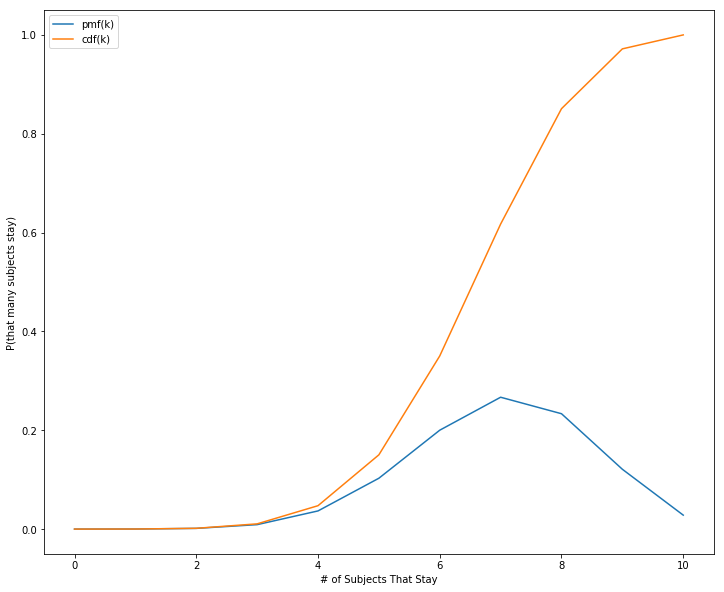

In [24]:
n_subjects = 10
p_subject_stays = .7
n_subjects_that_stay = range(11)

# probability that a given number of subjects stick around
pmfs = [stats.binom.pmf(n=n_subjects, p=p_subject_stays, k=k) for k in n_subjects_that_stay]

df = pd.DataFrame(dict(n_subjects_that_stay=n_subjects_that_stay, pmf=pmfs))

df['cdf'] = df.n_subjects_that_stay.apply(lambda k: stats.binom.cdf(p=p_subject_stays, n=n_subjects, k=k))
                                          
print(df)                              

plt.figure(figsize=(12, 10))
plt.plot(df.n_subjects_that_stay, df.pmf, label='pmf(k)')
plt.plot(df.n_subjects_that_stay, df.cdf, label='cdf(k)')
plt.ylabel('P(that many subjects stay)')
plt.xlabel('# of Subjects That Stay')
plt.legend()

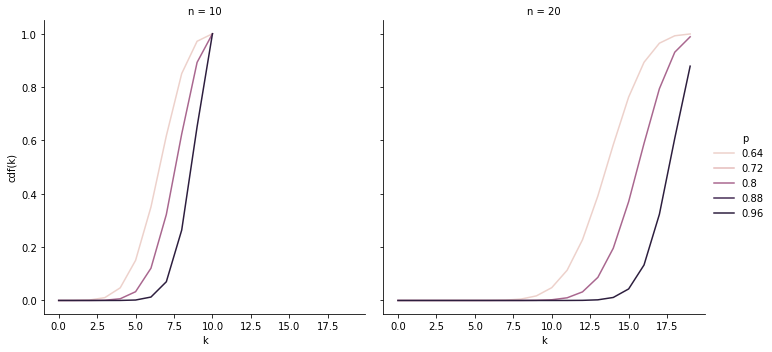

In [26]:
# below calculates probability that a subject stays in the study, at a 70, 80 or 90% likelihood someone stays
# considering 10 and 20 subject sets (10 or 20 mice or people or "subjects" in the experiment)

import itertools as it
from scipy import stats
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ps = [.7, .8, .9]
ns = [10, 20]
ks = range(20)  # probability of all possible subjects, from 0 to 20 possible subjects.


cdfs = [(p, n, k, stats.binom.cdf(n=n, p=p, k=k)) for p, n, k in it.product(ps, ns, ks)]
df = pd.DataFrame(cdfs, columns=['p', 'n', 'k', 'cdf(k)'])
df.loc[(df.n == 10) & (df.k > 10), 'cdf(k)'] = np.nan
df.dropna(inplace=True)

sns.relplot(data=df, x='k', y='cdf(k)', hue='p', col='n', kind='line')